&copy; Bedzyk Research Group 2020, Northwestern University

<div class="alert alert-block alert-warning">
To start this project, in the top menu bar click $\text{Cell}\to \text{ Run All}$. Then, scroll back up to the top of this document.
</div>

In [2]:
#http://blog.nextgenetics.net/?e=102
from IPython.display import HTML
HTML('''<script>
code_show_2=true; 
function code_toggle_2() {
 if (code_show_2){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show_2 = !code_show_2
} 
$( document ).ready(code_toggle_2);
</script>
The raw code for this Jupyter Notebook is by default hidden for easier reading.
To toggle on/off the raw code for this entire notebook, click <a href="javascript:code_toggle_2()">here</a>.''')


<div class="alert alert-block alert-warning">
Raw code is hidden by default for the entire notebook. You can toggle on/off the raw code for this entire notebook by clicking the button above. More importantly, raw code for individual cells can be shown/hidden by using the message/button: <img src="images/show_hide_button.png"/> Hiding the code is mainly for visual purposes and may be useful if you would like a hard copy (i.e. pdf) of this document. However, there are also instances where you will need to show the code cell so you can input different parameters. This button will show up repeatedly throughout this document. Try showing and hiding the code in the cell block below as an example.
</div>

In [3]:
# importing the necessary libraries and packages for XRR.ipynb
import ipywidgets as widgets
from ipywidgets import Label, Layout
from IPython.display import display, Markdown, clear_output
from IPython.display import display
from IPython.display import Image
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy import integrate
from IPython.display import IFrame



# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
# https://gist.github.com/Zsailer/5d1f4e357c78409dd9a5a4e5c61be552

# This tag allows the supression of input cells that have to deal with formatting and code.
# You are viewing the "code" version of the "click here" button you just pressed
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
(To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.)''')
display(tag)

# Jupyter Notebook Introduction

Jupyter Notebook is a an open source web application/user interface that allows users to create and share documents containing code, equations, visualizations, and narrative text by using a combination of different programming languages. In this Jupyter Notebook (*XRR.ipynb*), we will be using **Python 3** for all analysis purposes (in the top right corner of this page, you will see the tag Python 3 which tells you the programming language of the notebook). The most important concept of Jupyter Notebooks is the concept of a **cell block**. Clicking on a block of text or code will highlight (in blue in this case) the current cell block you are viewing. Click on this block of text. In the menu bar at the top of this document, you will see a drop down menu: <img src="images/markdown_dropdown.png"/> 

**Markdown** is referring the type of this cell block. Markdown is a text formatting language supported in Jupyter Notebook. By *double clicking* on the text you are reading right now, you will see the Markdown version of the cell block. You will see the other types of supported cell blocks by clicking the drop down menu. For example, "Code" is another type of cell block you will be seeing in this document and they all contain snippets of Python 3 code. 

To run code of a particular cell block, click into the cell and either click the run button above: 

<img src="images/run_jupyter.png"/>

or click "Shift+Enter" on your keyboard. Running a cell will also allow you to exit the "code view" version of a Markdown cell block. 

That is all you will need to know for this laboratory exercise. Have fun and we welcome any positive/negative feedback!

>**NOTE:** *Do not worry if you do not know Python or Markdown as there is no coding necessary for completing this project. In fact, most code cells can be left hidden for the entire exercise and you never even have to see code!*

# Re-accessing X-ray Lab Server

<div class="alert alert-block alert-danger">
Before beginning, make sure to locate your netID folder. This is where you will be saving all of your data. You should have already created a folder during the X-ray Reflectivity Exercise (Lab 1).

<br/>
    
In general, to save a scan: $\text{ Right click on scan } \to \text{ Save data }\to \text{ to File}$ 
<br/><br/>
On the lab computer, the location of the server is:
<br/><br/>
$\text{This PC} \to \text{mrc_xrayfac (\\\\resfiles.northwestern.edu)(Z:)} \to \text{netID folders} \to \text{[your_net_ID]}$

    
You may also wish to mount the server onto your computer. Click the following link and follow the appropriate steps if you would like to do so:
>https://kb.northwestern.edu/page.php?id=70525

For further clarification, see *XRR.ipynb* in this same directory.

 
</div>

<br/><br/>
<div align="center">
<font size="18" color="#990000"><b> Thin Film <br/> <br/> Off-Specular X-ray Diffraction </b></font>
</div>

# Overview of the technique

Lab 2 established the out-of-plane lattice orientation with respect to the substrate ($\alpha$ Al2O3 (006)) (Pt (111) or $\alpha$ Fe2O3 (006) parallel to $\alpha$ Al2O3 (006)). You also determined domain size and strain (i.e. d-spacing).

In lab 3, we will find if the film in-plane lattice vectors of the film and substrate are aligned (versus out of plane as done in lab 2). This exercise is to prove that the film is indeed an epitaxial film. The film could in fact be *textured*. If the film had a definite orientation in the out of plane direction, it could be that the film was textured such that in-plane domains were random. You should find that the film is not textured but has in plane epitaxial relation to the underlying substrate. To do this, we need to move the diffractometer axis such that we can line up off specular Bragg peaks. Prior to the lab, you need to plan this exercise by using CrystalMaker and subsidiary program SingleCrystal to judicioulsy locate *families* of off specular bragg peaks.

<strong>Lab 3</strong>: $\phi$ scans about the $c$ axis at fixed $\chi$ and $2\theta / \omega$ at specified (hkl) Bragg reflections will give you the in-plane orientation of the film to substrate. You should have used Single Crystal to determine what off-specular film and substrate (hkl) reflections you will target for this exercise.

In <strong>Single Crystal</strong>, in top menu bar, select Diffraction -> Select X-ray and Weighted Reciprocal Lattice

Then set direcion to (0 0 6) (or (0 0 1)) within the Single Crystal window

Go to layer 4

Click Stereogram, make sure view Stereogram is selected

Click on an (hkl) pole that you have entered (have to figure out what pole you will be looking for)

Within the Stereogram, Single Crystal reports the bearing (relative $\phi$, absolute determined once we find a peak) and the elevation (90 - $\chi$). Make sure you pick (hkl) that are sufficiently strong. This you can see by selecting the point in the Single Crystal weighted reciprocal lattice. You will find $\frac{I}{I{_\text{max}}}$. Also within the weighted reciprocal lattice, you will find a $2\theta$ value. Also make sure they are sufficiently off-specular.
- Example: For Al2O3, ($\bar{1} 1 4$), bearing = 90 (+n120), elevation = 51.8 (family = ($0\bar{1}4$) and ($104$)), 3 fold $\phi$ scan at $\chi = 90 - 51.8 = 38.2$ (this relatively storng reflection (34%) was found in layer 4 of Single Crystal. A weaker but more off-specular family will be found in layer 1 ($2\bar{1}1$) with 6-fold symmetry (bearing = 0 +/- n60 for 6 fold, elevation = 10.4 (90 - 10.4 = $\chi$))

To do the $\phi$ scan and hit each of the reflections in a given family, you need to first align the Al2O3 G$_{(006)}$ along the $\phi$ axis by adjusting R$_x$ and R$_y$ at $2\theta / \omega = $ 006 peak 

<br></br>

Going to use stereographic projection part of SingleCrystal. **FIND JOHN EMORY'S INTRODUCTION TO REFERENCE**
- Use SingleCrystal to show a stereographic projction of the (006) pole (elevation $90^{\circ}$, coming out at you) and elevations smaller than $90^{\circ}$ and greater than $0^{\circ}$.
- Show at least 4 families (one is (006) and the two families that have elevation angles 0 < elevation < 90, and family equal to 0 (Hint: one of the strong off-specular reflections is the (10-14) reflection, which on your stereogram, you should find as having an elevation angle of $51.8^{\circ}$ (North) if you have set the view direction in the 000-1 direction. This should be true for both Al_{2}O_{3} corrundum crystal structure). Also show the $\Delta\phi$ for these families
- The hematite 10-14 could have a slightly different elevation angle depending on the c/a ratio


Notice that when you look at stereographic projections, it will give you value of elevation angle and its bearing angle. The elevation angle is the compliment of $\chi$ on the SmartLab diffractometer ($\chi$ is tilt, see figure). The bearing angle is equivalent to the $\phi$ (azimuthal) angle plus some offset in $\phi$. Also in SingleCrystal, you can find the $2\theta$ value if you eneter $\lambda = 1.5405 \text{ nm}$ and your $\omega$ value will be $\frac{1}{2}2\theta$


# Experiment

- 2mm LLS (instead of 5mm)
- IS = 0.5mm, RS1 = RS2 = 0.7 mm

The alignment and set up will be similar to HRXRD ($2\theta$ scan, $Z$ scan) up to and including the substrate peak alignment. However, after aligning sample in $Z$, move sample out of the way and do a $2\theta / \chi$ scan (-2.5 to 2.5, step 0.05, speed 5) 


Do alignment for R_x and R_y and $\omega$ as seen in last code block of this notebook.

Now we move to Bragg peak for off specular reflection ($2\theta/\omega$ = 35.135 + $2\theta_0$ for ($\bar{1}14$ and move $\chi$ to correct elevation).

Do rough $\phi$ scan from 0 to 360 (10 minute scan, 0.03 step, 36 deg/min)

Go to highest intensity phi peak. Do fine $\phi$ scan (+/- 1 deg, 0.004 step, 2 deg/min). Optimize $2\theta/\omega$ (+/- 0.25, 0.008, 0.5), $\chi$ (+/- 1, 0.01, 3). Do fine $\phi$ scan of that single peak. Run complete $\phi$ scan again (0 to 360, 0.032, 36).

Now do it for the film, steps are the same only we will move to a different $2\theta/\omega$ and $\chi$ based on film crystal maker stuff (find $2\theta/\omega$ and elevation (33.1155 and 51.8 for Fe2O3))

For $\phi$ scans (+/- 2, step 0.05, 2deg/min)

## Example 
10nm Fe2O3

2$\theta_{0}$ = 0.017

2$\theta\chi_0$ = -0.206

$Z$ = -0.940

Rx, Ry, and $\omega$ shown below.

$\phi_{\text{peak}}$ =73.37 (saphhire)

$\phi_{\text{peak}}$ = 73.83 (hematitie) (100cps)

#  Determine Miscut of Surface and Align Phi-Axis
*Date of Test Run: 20200910*

**A.** Align $\phi$ axis of the diffractomter with the $c$-axis of the substrate. In doing so, you will be determining the miscut angle of the surface relative to the $c$-planes (basal planes) of the substrate. This should be  between $0^{\circ}$ and $1^{\circ}$. The miscut is the result of how the crystal was cut and polished and usually a specification given by the manufacturer. In some cases, there is an intentional miscut of the surface to enhance epitaxial growth in a process where the nucleation occurs at step edges (a particular orientaion). 
    - Align by adjusting R$_x$ and R$_y$.
**B.** $\phi$ scans as fixed $\omega$, $\chi$

### Follow the steps below to determine the miscut of the substrate:
1. IS = 0.1mm, RS1 = RS2 = 0.2mm for alignment, Soller Slit = $5^{\circ}$.
    - 2$\theta\chi$ scan should be around $10^{6}$ cps (-2 to 2 $^{\circ}$)
    - 2$\theta$ scan, -0.2 to 0.2, flat top looking peak, should be at 0.0018$^{\circ}$
    
    
2. Align the sample (z-scan) (same steps as before) (also involves R$_y$ scan -1 to 1) ($2\theta\omega$ was moved to 1 degree for this part)
3. Now move $2\theta$ to Al$_2$O$_3$ (006) peak ($2\theta  = 41.6666^{\circ}$), do a $\omega$ scan (relative -0.2 to 0.2, 0.001 deg step, 1 deg/min)
    - $2\theta\omega$, -0.1 to 0.1 relative, 0.002 step, 1 deg/min, peak might not be exactly 41.667 (move to that peak), we will keep $2\theta$ equal to this value (~41.6674)
    - Now do $\omega$ scans stepping $45^{\circ}$ in $\phi$ ($\phi = $ 0, 45, 90 135, 180, ..., 360), $\omega$ scans can now be from -0.1 to 0.1 (make a **table** of the $\omega$ peak values at each $\phi$ value). Then fit to the equation below.
    - Rotate to $\phi = \phi_0$
    - Do R$_y$ -0.05 to 0.05 relative, 0.01 step, 0.5 deg/min and R$_x$ -2 to 2, 0.1 step, 8 deg/min

### Calculating Miscut

0. Align in surface normal (you could do this with a laser, but otherwise you use specular reflection from surface to find surface normal, low angle)
1. Determine miscut
1. Go to (006) peak of sapphire
3. $\omega$ vs. $\phi$ plot

# STEP LIST IN-PLANE SCANS (GENERAL)

$$\omega(\phi) = \gamma\sin(\phi-\phi_0)+\omega_0$$

gamma = 0.1393379062177215
phi_0 = -2.3245997325251224
omega_0 = 20.8495
2_theta = 41.699


20.8335

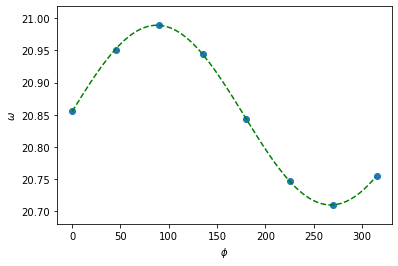

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# For test run of 461 lab 3
# fitting the miscut curve
#phi = [0.,45.,90.,135.,180.,225.,270.,315.]
phi = [0.,45.,90.,135.,180.,225.,270.,315.]
phi2 = [i * math.pi/180 for i in phi]

#measured for Fe2O3 50nm film on 006 sapphire
omega = [20.864,20.856,20.843,20.831, 20.829, 20.836, 20.849, 20.859]
#measured for Pt 18nm film on 006 sapphire
omega2 = [20.856, 20.951, 20.989, 20.944, 20.844, 20.747, 20.710, 20.755]

def fit(x,gamma,phi_0,omega_0):
    return gamma*np.sin(x-phi_0)+omega_0

popt, pcov = curve_fit(fit, phi2, omega2)

x=np.arange(0,315)
x2 =[i * math.pi/180 for i in x]
x3 =[i * 180 / math.pi for i in x2]

plt.scatter(phi,omega2)
plt.plot(x3,fit(x2,*popt),'g--')
plt.xlabel("$\phi$")
plt.ylabel("$\omega$")

print("gamma = " + str(popt[0]))
print("phi_0 = " + str(popt[1]*180/math.pi))
print("omega_0 = " + str(popt[2]))
print("2_theta = "+str(popt[2]*2))
41.667/2

$\phi_0$ is the azimuthal angle at which plane is defined perpendicular to the scattering plane

### Off-specular

1. Move to 006 peak substrate normal, then have to align Rx and Ry as suggested in Carlos's picture

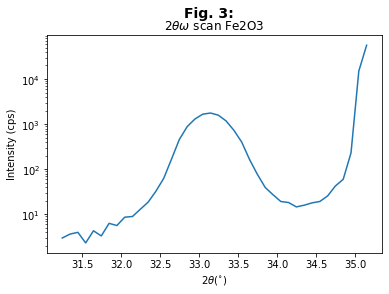

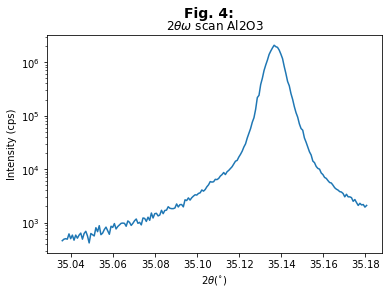

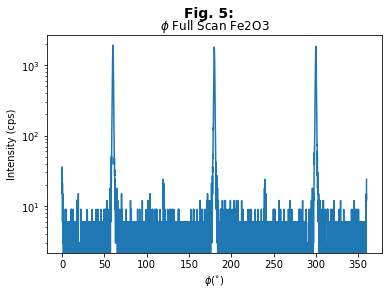

In [6]:
#Reading in example data files

display(tag)
df_2tw_fe2o3 = pd.read_table('example/461_test/PLD50nmFe2O3_Al2O3/Off_Specular_Lab/2TW_Fe2O3_014_0014_Scan2020Sep10-193543.dat',sep = '\s+',comment='*',names = ["2TH","Intensity"],header = 1)
plt.figure()
plt.suptitle('Fig. 3:', fontsize=14, fontweight='bold')
plt.title('$2\\theta\omega$ scan Fe2O3')
plt.plot(df_2tw_fe2o3[df_2tw_fe2o3.columns[0]],df_2tw_fe2o3[df_2tw_fe2o3.columns[1]])
plt.yscale('log')
plt.xlabel("2$\\theta$($^{\circ}$)")
plt.ylabel(df_2tw_fe2o3.columns[1]+" (cps)")
plt.show()

df_2tw_al2o3 = pd.read_table('example/461_test/PLD50nmFe2O3_Al2O3/Off_Specular_Lab/2TW_Al2O3_014_0012_Scan2020Sep10-174204.dat',sep = '\s+',comment='*',names = ["2TH","Intensity"],header = 1)
plt.figure()
plt.suptitle('Fig. 4:', fontsize=14, fontweight='bold')
plt.title('$2\\theta\omega$ scan Al2O3')
plt.plot(df_2tw_al2o3[df_2tw_al2o3.columns[0]],df_2tw_al2o3[df_2tw_al2o3.columns[1]])
plt.yscale('log')
plt.xlabel("2$\\theta$($^{\circ}$)")
plt.ylabel(df_2tw_al2o3.columns[1]+" (cps)")
plt.show()


df_2tw_phi_full_fe2o3 = pd.read_table('example/461_test/PLD50nmFe2O3_Al2O3/Off_Specular_Lab/PHIFULL_Fe2O3_014_0007_Scan2020Sep10-194250.dat',sep = '\s+',comment='*',names = ["2TH","Intensity"],header = 1)
plt.figure()
plt.suptitle('Fig. 5:', fontsize=14, fontweight='bold')
plt.title('$\phi$ Full Scan Fe2O3')
plt.plot(df_2tw_phi_full_fe2o3[df_2tw_phi_full_fe2o3.columns[0]],df_2tw_phi_full_fe2o3[df_2tw_phi_full_fe2o3.columns[1]])
plt.yscale('log')
plt.xlabel("$\phi$($^{\circ}$)")
plt.ylabel(df_2tw_phi_full_fe2o3.columns[1]+" (cps)")
plt.show()

In [43]:
# For aligning phi (omega scans (+/- 0.05, 0.0008,.8), Ry (+/- 1, 0.01, 4), Rx(+/- 2, 0.05, 4))
Ry0 = -0.076
Rx0 = 0
omega_phi0 = 20.8606
omega_phi180 = 20.9164
Ry_new = Ry0 - (omega_phi180 - omega_phi0)/2 
print(Ry_new)
omega_new = 20.888
omega_phi90 = 21.0179
omega_phi270 = 20.7578
Rx_new = Rx0 + (omega_phi90-omega_phi270)/2
print(Rx_new)

#Then do omega scan at phi = 0 and Rx_new and Ry_new (20.8854)

#Then do omega scan at phi = 180 and Rx_new and Ry_new (20.8908)

omega_phi0_2 = 20.8854
omega_phi180_2 = 20.8908
print((omega_phi180_2 - omega_phi0_2)/2 )
Ry_new2 = Ry_new - (omega_phi180_2 - omega_phi0_2)/2 

print(Ry_new2)

# Then do omega scan at phi = 0

# THEN WE NEVER MOVE OMEGA AGAIN, OR Ry OR Rx (THIS IS VERY PRECISE ALIGNMENT)

-0.10389999999999892
0.13005000000000067
0.0026999999999990365
-0.10659999999999796
